In [3]:
# Training a neural network on MNIST with Keras&Tensorflow


import tensorflow as tf  # TensorFlow für Machine Learning / Deep Learning (z. B. neuronale Netze)
import matplotlib.pyplot as plt  # Matplotlib zum Plotten von Daten und Visualisierungen
import numpy as np  # NumPy für numerische Berechnungen und effiziente Array-Verarbeitung

2025-05-03 16:10:49.604420: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-03 16:10:49.671470: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-03 16:10:49.903601: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-03 16:10:50.056850: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746288650.325128    2579 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746288650.41

In [4]:
tf.__version__  # Gibt die aktuell verwendete TensorFlow-Version als String zurück (z. B. '2.15.0')

'2.19.0'

In [18]:
# X_train_full: 60.000 Trainingsbilder (28x28 Pixel, Graustufen)
# y_train_full: Zuordnung der Ziffern (Labels 0–9)
# X_test: 10.000 Testbilder zum Modellprüfen

mnist = tf.keras.datasets.mnist  # Lädt das MNIST-Datenset aus TensorFlow (handschriftliche Ziffern 0–9)

# Lädt die Trainings- und Testdaten (Bilder + Labels)
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# X_train_full.shape  # (Optional) Gibt die Form der Trainingsdaten zurück, z. B. (60000, 28, 28)

In [19]:
# Teilt die ersten 5.000 Bilder als Validierungsdaten ab und normalisiert (Werte 0–1)
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.

# Teilt die zugehörigen Labels entsprechend auf (Validierung + Training)
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Normalisiert die Testdaten ebenfalls (0–1 Bereich)
X_test = X_test / 255.

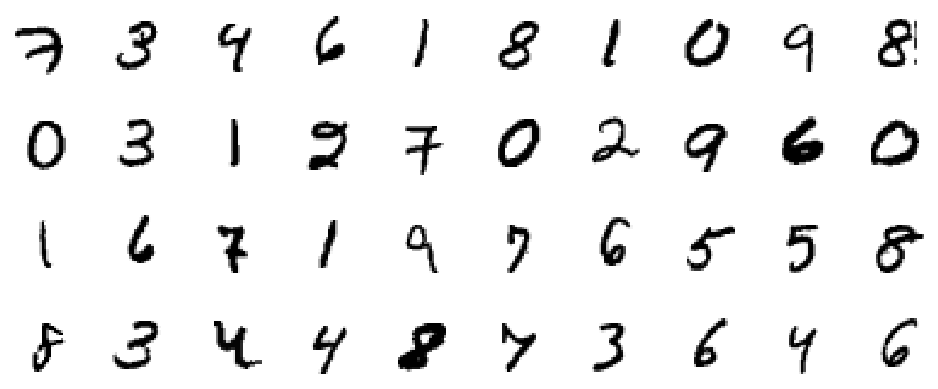

In [20]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))  # Bildgröße definieren

# Zeigt 40 Beispielbilder aus dem Trainingsset in einem Raster
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)  # Rasterfeld auswählen
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")  # Bild anzeigen (Graustufen)
        plt.axis('off')  # Achsen ausblenden

plt.subplots_adjust(wspace=0.2, hspace=0.5)  # Abstand zwischen den Bildern
plt.show()  # Ausgabe anzeigen

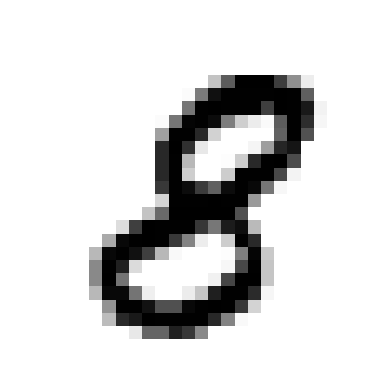

In [21]:
plt.imshow(X_train[5], cmap="binary")  # Zeigt das 6. Trainingsbild in Graustufen
plt.axis('off')  # Achsen ausblenden
plt.show()  # Bild anzeigen

In [22]:
y_train  # Enthält die Ziffernlabels (0–9) für die Trainingsbilder

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [23]:
# TODO: Define the model architecture here
# model =  ....

from tensorflow import keras
from tensorflow.keras import layers

# Modell mit Flatten + 2 Hidden Layers + Output-Layer
model = keras.models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),      # Wandelt 2D-Bilder (28x28) in 1D-Vektor um
    layers.Dense(128, activation='relu'),      # Erste versteckte Schicht mit 128 Neuronen (ReLU)
    layers.Dense(64, activation='relu'),       # Zweite versteckte Schicht mit 64 Neuronen (ReLU)
    layers.Dense(10, activation='softmax')     # Ausgabeschicht: 10 Klassen (0–9), Softmax für Klassifikation
])

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  # Mehrklassen-Klassifikation, Softmax-Ausgabe → from_logits=False
    optimizer=tf.keras.optimizers.Adam(),                  # Stochastic Gradient Descent
    metrics=["accuracy"]              # Verfolge die Klassifikationsgenauigkeit beim Training
)

In [26]:
# TODO: Train the model using model.fit
# history = model.fit(...) # 1 epoch is a full pass over the whole training set, let's tray for 15 eopchs

# Trainiert das Modell über 15 Epochen auf den Trainingsdaten und validiert mit den Validierungsdaten
history = model.fit(
    X_train, y_train,              # Trainingsdaten
    epochs=15,                     # 15 vollständige Durchläufe (Epochen) durch das Trainingsset
    validation_data=(X_valid, y_valid)  # Validierungsdaten zur Überwachung der Generalisierung
)

Epoch 1/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8714 - loss: 0.4377 - val_accuracy: 0.9664 - val_loss: 0.1218
Epoch 2/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9680 - loss: 0.1061 - val_accuracy: 0.9684 - val_loss: 0.0975
Epoch 3/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9785 - loss: 0.0705 - val_accuracy: 0.9736 - val_loss: 0.0857
Epoch 4/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9824 - loss: 0.0523 - val_accuracy: 0.9788 - val_loss: 0.0713
Epoch 5/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9873 - loss: 0.0409 - val_accuracy: 0.9778 - val_loss: 0.0824
Epoch 6/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9901 - loss: 0.0321 - val_accuracy: 0.9770 - val_loss: 0.0890
Epoch 7/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9909 - loss: 0.0281 - val_accuracy: 0.9748 - val_loss: 0.0962
Epoch 8/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9913 - loss: 0.0244 - 

In [27]:
model.evaluate(X_test, y_test)  # Bewertet das Modell auf den Testdaten (Loss + Accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9743 - loss: 0.1364


[0.11216079443693161, 0.9778000116348267]

In [29]:
X_new = X_test[:3]                 # Wähle die ersten 3 Bilder aus dem Testset
y_proba = model.predict(X_new)    # Berechne die Klassenzugehörigkeits-Wahrscheinlichkeiten
y_proba.round(2)                  # Runde die Vorhersagewerte auf 2 Nachkommastellen (zur besseren Übersicht)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [30]:
y_pred = np.argmax(y_proba, axis=1)  # Wählt für jedes Beispiel die Klasse mit der höchsten Wahrscheinlichkeit (Mehrklassen-Klassifikation)

# Falls es sich um binäre Klassifikation handelt (z. B. 0 oder 1), stattdessen:
# y_pred = (y_proba > 0.5).astype("int32")  # Schwellenwert 0.5 → rundet zu 0 oder 1

y_pred  # Vorhergesagte Klassenlabels (z. B. [7, 2, 1])

array([7, 2, 1])

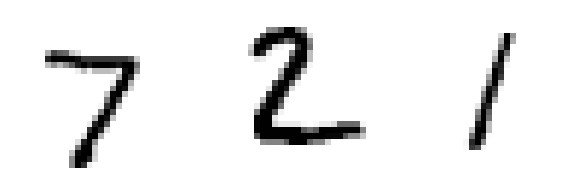

In [31]:
plt.figure(figsize=(7.2, 2.4))  # Legt die Gesamtgröße der Grafik fest

# Zeigt die 3 Testbilder nebeneinander
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)  # 1 Zeile, 3 Spalten → wähle jeweiliges Feld
    plt.imshow(image, cmap="binary", interpolation="nearest")  # Bild in Graustufen anzeigen
    plt.axis('off')  # Achsen ausblenden

plt.subplots_adjust(wspace=0.2, hspace=0.5)  # Abstand zwischen den Bildern anpassen
plt.show()  # Darstellung anzeigen

In [38]:
# Bild laden und auf 28x28 skalieren, Graustufen
img = tf.keras.utils.load_img("/workspaces/RAG-and-embeddings/data/digit.png", target_size=(28, 28), color_mode="grayscale")

# Bild in Array umwandeln und invertieren (1 - pixel) → passt zu MNIST (Ziffern hell auf dunklem Hintergrund)
img_array = 1 - tf.keras.utils.img_to_array(img) / 255.0

# Schwellenwert anwenden: alle Pixel < 0.5 als Hintergrund definieren
background = img_array < 0.5

# Hintergrundpixel auf exakt 0 setzen (optional für Klarheit)
img_array[background] = 0.0

# Batch-Dimension hinzufügen → (1, 28, 28, 1)
img_array = tf.expand_dims(img_array, 0)

In [39]:
img_array.shape  # Gibt die Form des Bildarrays zurück: (1, 28, 28, 1) → 1 Bild, 28x28 Pixel, 1 Kanal (Graustufen)

TensorShape([1, 28, 28, 1])

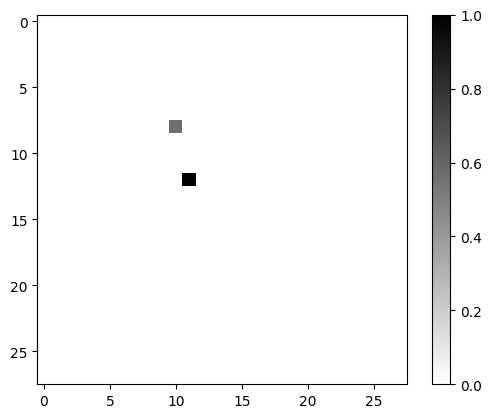

In [40]:
plt.imshow(img_array[0, ...], cmap="binary", interpolation="nearest")  # Zeigt das erste (und einzige) Bild aus dem Array in Graustufen
plt.colorbar()  # Fügt eine Farbskala hinzu, die Pixelwerte visualisiert (0 = schwarz, 1 = weiß)

In [41]:
# Führt eine Vorhersage mit dem Modell durch (in Inferenzmodus, kein Training)
predictions = model(img_array, training=False)

# Wandelt die Rohwerte (Logits) in Wahrscheinlichkeiten um
score = tf.nn.softmax(predictions)

# Gibt die wahrscheinlichste Klasse + Konfidenz in Prozent aus
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(np.argmax(predictions, axis=1), 100 * np.max(score))
)

# Gibt den Softmax-Vektor aus (Wahrscheinlichkeit für jede der 10 Klassen)
print(score)

This image most likely belongs to [5] with a 20.42 percent confidence.
tf.Tensor(
[[0.08753706 0.08751509 0.09022221 0.08817602 0.08774874 0.20417614
  0.08808733 0.08939382 0.08870037 0.08844327]], shape=(1, 10), dtype=float32)


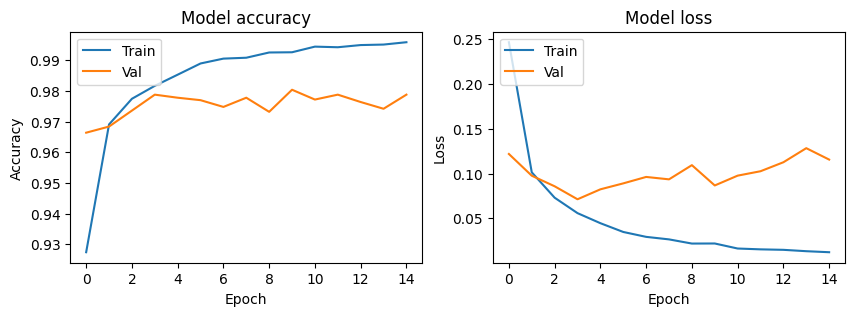

In [42]:
plt.figure(figsize=(10, 3))  # Legt die Größe der gesamten Grafik fest

# 📈 Plot der Genauigkeit (Accuracy) pro Epoche
plt.subplot(121)  # Linkes Diagramm
plt.plot(history.history['accuracy'])        # Trainingsgenauigkeit
plt.plot(history.history['val_accuracy'])    # Validierungsgenauigkeit
plt.title('Model accuracy')                  # Titel
plt.ylabel('Accuracy')                       # Y-Achse
plt.xlabel('Epoch')                          # X-Achse
plt.legend(['Train', 'Val'], loc='upper left')  # Legende

# 📉 Plot des Verlusts (Loss) pro Epoche
plt.subplot(122)  # Rechtes Diagramm
plt.plot(history.history['loss'])            # Trainingsverlust
plt.plot(history.history['val_loss'])        # Validierungsverlust
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.show()  # Zeigt beide Diagramme an
